In [2]:
# friendly support from: https://towardsdatascience.com/machine-learning-logistic-regression-with-python-5ed4ded9d146

# Logistic Regression is the ideal tool for Binary Classification 
# Importing packages

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools 
import matplotlib.pyplot as plt # visualizations
import seaborn as sns
from matplotlib import rcParams # plot size customization
#!pip install termcolor
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_score as js # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric


rcParams['figure.figsize'] = (20, 10)

In [3]:
# Importing the data and EDA

df = pd.read_csv('screwdriverstatisticsII.csv', sep='\s+', delimiter=';', header = 0, parse_dates=True, squeeze=True, decimal = "," )
df.head()
df.set_index('Id')



,UnitPartNo,UnitSnNo,TimeStamp,Seq,PN,PT,RC,T1,T2,RA,RD,ET,CN,ScrewdriverId
Id,,,,,,,,,,,,,,
43,136U3748,MICHAEL,2020-08-07 11:58:55.5990000,1,2,0,1,2.041774,1.517809,5.277778,29.957031,1.023992,1.197830e-41,2
44,136U3748,MICHAEL,2020-08-07 11:58:55.6000000,2,2,0,1,2.007969,1.527950,11.111112,29.550781,1.009991,1.197970e-41,2
45,136U3748,MICHAEL,2020-08-07 11:58:55.6010000,3,2,0,1,2.015575,1.511048,9.444445,29.996094,1.001991,1.198110e-41,2
46,136U3748,MICHAEL,2020-08-07 11:58:55.6020000,4,2,0,10,0.087891,0.087891,7073.333496,48.316406,3.017964,1.198250e-41,2
47,136U3748,MICHAEL,2020-08-07 11:58:55.6040000,5,2,0,1,2.012195,1.211881,246.666672,32.839844,2.453005,1.198390e-41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,136Z8917,DG000007,2020-08-27 13:38:54.2170000,12,2,0,1,2.053605,1.214416,9.444445,45.332031,1.015991,1.202034e-41,2
665,136Z8917,DG000007,2020-08-27 13:38:54.2170000,13,2,0,1,2.045999,1.216106,7.500000,45.710938,1.020992,1.202174e-41,2
666,136Z8917,DG000007,2020-08-27 13:38:54.2170000,14,2,0,1,2.007124,1.256671,3.611111,46.406250,1.271003,1.202314e-41,2


# Statistical Exploration

In [4]:
df.describe()

,Id,Seq,PN,PT,RC,T1,T2,RA,RD,ET,CN,ScrewdriverId
count,626.000000,626.000000,626.000000,626.0,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,6.260000e+02,626.000000
mean,355.500000,8.773163,2.057508,0.0,1.445687,1.933974,1.292508,371.699512,52.526065,1.254543,1.322345e-41,1.817891
std,180.854914,4.818263,0.411689,0.0,1.954135,0.436477,0.327767,1531.793790,28.456190,0.614437,2.616863e-42,0.386243
min,43.000000,1.000000,2.000000,0.0,1.000000,0.087891,0.087891,3.333333,29.550781,0.372999,1.197830e-41,1.000000
25%,199.250000,5.000000,2.000000,0.0,1.000000,2.012195,1.211881,5.555556,32.570312,0.923992,1.198531e-41,2.000000
50%,355.500000,9.000000,2.000000,0.0,1.000000,2.024026,1.254981,9.444445,45.011719,1.023992,1.199231e-41,2.000000
75%,511.750000,13.000000,2.000000,0.0,1.000000,2.056985,1.502597,13.055556,51.117188,1.368008,1.199932e-41,2.000000
max,668.000000,19.000000,5.000000,0.0,10.000000,2.469397,2.469397,7073.333496,120.316406,3.017964,1.877740e-41,2.000000


# Correlation 

In [5]:
df.corr()

,Id,Seq,PN,PT,RC,T1,T2,RA,RD,ET,CN,ScrewdriverId
Id,1.000000,0.101610,0.186827,NaN,-0.087786,0.057425,0.126571,-0.089748,0.611183,0.051359,0.627261,-0.626680
Seq,0.101610,1.000000,0.079181,NaN,-0.226300,0.234008,-0.009991,-0.232337,0.246820,-0.236831,0.122786,-0.120243
PN,0.186827,0.079181,1.000000,NaN,-0.031910,-0.062697,0.190326,-0.028216,0.254102,-0.020158,0.296382,-0.296271
PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RC,-0.087786,-0.226300,-0.031910,NaN,1.000000,-0.966183,-0.839563,0.999424,-0.033794,0.655614,-0.108329,0.107706
T1,0.057425,0.234008,-0.062697,NaN,-0.966183,1.000000,0.857187,-0.966363,-0.007258,-0.674993,0.059493,-0.058836
T2,0.126571,-0.009991,0.190326,NaN,-0.839563,0.857187,1.000000,-0.841416,0.059438,-0.726178,0.183664,-0.183686
RA,-0.089748,-0.232337,-0.028216,NaN,0.999424,-0.966363,-0.841416,1.000000,-0.037595,0.671097,-0.110545,0.109905
RD,0.611183,0.246820,0.254102,NaN,-0.033794,-0.007258,0.059438,-0.037595,1.000000,0.094859,0.964682,-0.964332
ET,0.051359,-0.236831,-0.020158,NaN,0.655614,-0.674993,-0.726178,0.671097,0.094859,1.000000,0.111580,-0.112287


## Correlation Heatmap



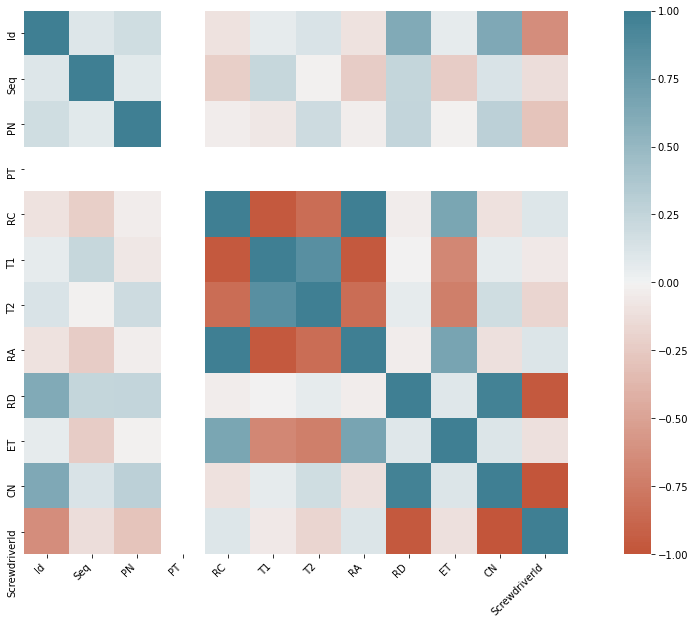

In [7]:
corr = df.corr()
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, 
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Testing Plotting here (delete later if not useful) 

In [ ]:
df_stats = df.describe()
df_stats

In [ ]:
df_stats_trans = df_stats
df_stats_trans.T

# Dataset Information

In [ ]:
df.info()

In [ ]:
# Converting "TimeStamp" to datetime 
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
print("Data types are:\n",df.dtypes) 
# Converting 'RC' into category dtype 
df['RC'] = df['RC'].astype('category')
df.info()

In [ ]:
# Note to self about the labels: 
# 0 = OK scrweprocess (RC = 1)
# 1 = Not OK (everything that wasnt RC = 1)

In [ ]:
# Splitting the data

# following columns failed due to being string attributes: 'Id', 'UnitPartNo', 'UnitSnNo', 'TimeStamp',
# this could potentially be solved through one hot encoding the values 
X_var = np.asarray(df[['Seq', 'PN', 'PT', 'T1', 'T2', 'RA', 'RD', 'ET', 'CN', 'ScrewdriverId' ]])

# makes the categorical RC codes into binary 
y_var = np.asarray(df['RC'].cat.codes)


print(cl('X_var samples : ', attrs = ['bold']), X_var[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_var[:5])

X_var = StandardScaler().fit(X_var).transform(X_var)

print(cl(X_var[:5], attrs = ['bold']))

# Here is when the actual splitting happens 
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 4, shuffle = True)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[:10])

In [ ]:
# Modelling

lr = LogisticRegression(C = 0.1, solver = 'liblinear')
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob[:10])

In [ ]:
# Evaluation

# 0. Super basic evaluation 

lr_score = lr.score(X_test,y_test)
print("Prediction score: ", lr_score)

# 1. Jaccard Index

print(cl('Jaccard Score of our model is {}'.format(js(y_test, yhat).round(2)), attrs = ['bold']))

# 2. Precision Score

print(cl('Precision Score of our model is {}'.format(precision_score(y_test, yhat).round(2)), attrs = ['bold']))

# 3. Log loss

print(cl('Log Loss of our model is {}'.format(log_loss(y_test, yhat).round(2)), attrs = ['bold']))

# 4. Classificaton report

print(cl(classification_report(y_test, yhat), attrs = ['bold']))

def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

In [ ]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)
print("y_test: ", y_test)
print("yhat: ", yhat)

In [ ]:
# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['label=1','label=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')